# Implementing SVM on iris dataset

The intuition is to increase the gap between the classification clusters. It tries to improve the cost function used in Logistic Regression. A SVM function uses similarity function. Similarity function converts n features to n' features. Using the landmark points(training data) we find a similarity function. For eg. if we have m data points and n features, we find similarity of these n features from m data points and in effect n features are converted to m dimension.

In [1]:
#Necessary imports
import numpy as np
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
#Loading the dataset
iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

In [8]:
#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [9]:
#Creating a classifier
clf = svm.SVC()
#the default kernel is rbf
clf.fit(x_train,y_train)

SVC()

In [10]:
#Calculating the score
clf.score(x_test,y_test)

0.7368421052631579

In [11]:
def makegrid(x1,x2,h = 0.02):
    x1_min,x1_max = x1.min()-1,x1.max()+1
    x2_min,x2_max = x2.min()-1,x2.max()+1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min,x2_max,h)
    xx,yy = np.meshgrid(a,b) #suppose a=[1,2] and b=[3,4] we want points: [1,3][1,4][2,3][2,4]
    #So meshgrid would give us repeated values
    return xx,yy

In [12]:
#Just for understanding
x1 = np.array([1,3])
x2 = np.array([5,6])
makegrid(x1,x2)

(array([[0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        ...,
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98]]),
 array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
        [4.02, 4.02, 4.02, ..., 4.02, 4.02, 4.02],
        [4.04, 4.04, 4.04, ..., 4.04, 4.04, 4.04],
        ...,
        [6.94, 6.94, 6.94, ..., 6.94, 6.94, 6.94],
        [6.96, 6.96, 6.96, ..., 6.96, 6.96, 6.96],
        [6.98, 6.98, 6.98, ..., 6.98, 6.98, 6.98]]))

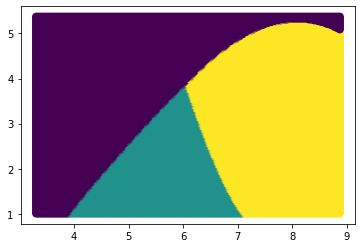

In [13]:
#Plotting decision boundaries
xx,yy = makegrid(x[:,0],x[:,1])
predictions = clf.predict(np.c_[xx.ravel(),yy.ravel()])
#ravel will convert everything into a 1D array and np.c_ will combine these to make pairs(points like 1,3)
plt.scatter(xx.ravel(),yy.ravel(),c = predictions)
plt.show()

## For Regression

In [2]:
#For continuous data points (Regression)
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [3]:
#splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [4]:
#Creating the classifier with rbf kernel
clf1 = svm.SVR(kernel="rbf") #Using SVR instead of SVC
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)

0.08369460247143334

In [5]:
#Creating the classifier with linear kernel
clf2 = svm.SVR(kernel="linear") #Using SVR instead of SVC
clf2.fit(X_train,Y_train)
clf2.score(X_test,Y_test)

0.5635479105806482

In [7]:
#Demonstration with some sample data
clf = svm.SVR()
from sklearn.model_selection import GridSearchCV
grid = {'C':[1e2,1e3,5e3,1e4,5e4,1e5],
       'gamma':[1e-4,5e-4,1e-4,5e-3]}
abc = GridSearchCV(clf,grid)
abc.fit(X_train,Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.0001, 0.0005, 0.0001, 0.005]})

In [8]:
abc.best_estimator_

SVR(C=1000.0, gamma=0.0001)

In [9]:
abc.score(X_test,Y_test)

0.6022138976857516